<a href="https://colab.research.google.com/github/ApoorvaMP/Customer-Conversion-Prediction/blob/main/Project_CCP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement :

You are working for a new-age insurance company and employ multiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance.


# Features :

* age (numeric)
* job : type of job
* marital : marital status
* educational_qual : education status
* call _ type : contact communication type
* day : last contact day of the month (numeric)
* mon : last contact month of the year
* dur : last contact duration, in seconds (numeric)
* num_calls : number of contacts performed during this campaign and for this client
* prev_outcome : outcome of the previous marketing campaign (catagorical:'unknown','other','faliure','success')
* output variable (desired target) : y - has the client subscribed to the insurance?

# Minimum Requirements:

It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price.

AUROC must be used as a metric to evaluate the performance of the models.
















1. This is a Supervised Learning Problem.
2. It is a Classification problem with Catagorical data.
3. Here, the target variable is y.

In [ ]:
#Program Initiation:

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


In [ ]:
#Import Dataset:
df = pd.read_csv('/content/Customer prediction data.csv')

In [ ]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [ ]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [ ]:
df['y']=df['y'].map({'yes':1,'no':0})

In [ ]:
df.shape

(45211, 11)

# Cleaning the Data includes 4 steps :
1. Check for missing values
2. Remove duplicates
3. Check data format is right
4. Check if it is structured data
5. Check for outliers

In [ ]:
# Step 1 : To check if there are any missing values

df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

There are no null/missing values in any columns.

In [ ]:
# Step 2 : To check and eliminate duplicates

df = df.drop_duplicates()

In [ ]:
df.shape

(45205, 11)

There were 6 duplicates which are eliminated from the dataset(df).

In [ ]:
# Step 3 : To check if data is in right format

df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                  int64
dtype: object

Dataset is in the right format so no change is required.

Step 4 : To check if it is a structured dataset.

The dataset is already present in rows and columns format hence it is a structured dataset.

In [ ]:
# Step 5 : To check if there are any outliers present.

df.describe()

,age,day,dur,num_calls,y
count,45205.000000,45205.00000,45205.000000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898,0.117000
std,10.619130,8.32234,257.538504,3.098189,0.321424
min,18.000000,1.00000,0.000000,1.000000,0.000000
25%,33.000000,8.00000,103.000000,1.000000,0.000000
50%,39.000000,16.00000,180.000000,2.000000,0.000000
75%,48.000000,21.00000,319.000000,3.000000,0.000000
max,95.000000,31.00000,4918.000000,63.000000,1.000000


# Age :

In [ ]:
df.age.quantile(0.75)

48.0

In [ ]:
df.age.quantile(0.25)

33.0

In [ ]:
iqr = df.age.quantile(0.75) - df.age.quantile(0.25)
upper_threshold = df.age.quantile(0.75) + (1.5 * iqr) #q3 + 1.5*iqr
upper_threshold

70.5

In [ ]:
lower_threshold = df.age.quantile(0.75) - (1.5 * iqr) #q3 - 1.5*iqr
lower_threshold

25.5

# Day :

In [ ]:
df.day.quantile(0.75)

21.0

In [ ]:
df.day.quantile(0.25)

8.0

In [ ]:
iqr = df.day.quantile(0.75) - df.day.quantile(0.25)
upper_threshold = df.day.quantile(0.75) + (1.5 * iqr) #q3 + 1.5*iqr
upper_threshold

40.5

In [ ]:
lower_threshold = df.day.quantile(0.75) - (1.5 * iqr) #q3 - 1.5*iqr
lower_threshold

1.5

# Dur :

In [ ]:
df.dur.quantile(0.75)

319.0

In [ ]:
df.dur.quantile(0.25)

103.0

In [ ]:
iqr = df.dur.quantile(0.75) - df.dur.quantile(0.25)
upper_threshold = df.dur.quantile(0.75) + (1.5 * iqr) #q3 + 1.5*iqr
upper_threshold

643.0

In [ ]:
lower_threshold = df.dur.quantile(0.75) - (1.5 * iqr) #q3 - 1.5*iqr
lower_threshold

-5.0

# Num_Calls :

In [ ]:
df.num_calls.quantile(0.75)

3.0

In [ ]:
df.num_calls.quantile(0.25)

1.0

In [ ]:
iqr = df.num_calls.quantile(0.75) - df.num_calls.quantile(0.25)
upper_threshold = df.num_calls.quantile(0.75) + (1.5 * iqr) #q3 + 1.5*iqr
upper_threshold

6.0

In [ ]:
lower_threshold = df.num_calls.quantile(0.75) - (1.5 * iqr) #q3 - 1.5*iqr
lower_threshold

0.0

# EDA :
EDA helps us to analyse data visually and to understand important features that might have an impact in drawing conclusions.

# Age & Day :

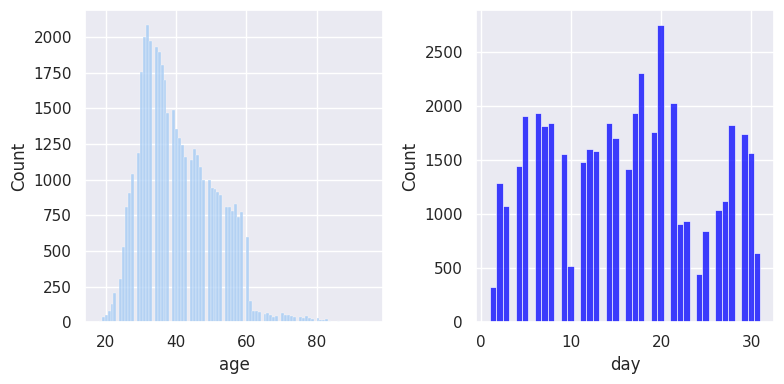

In [ ]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.histplot(df.age)
plt.subplot(1,2,2)
sns.histplot(df.day,color = 'blue')
plt.tight_layout()

Observation :
The age group between 20 to 55 are active in insurance subscription.

# Dur & Num_Calls :

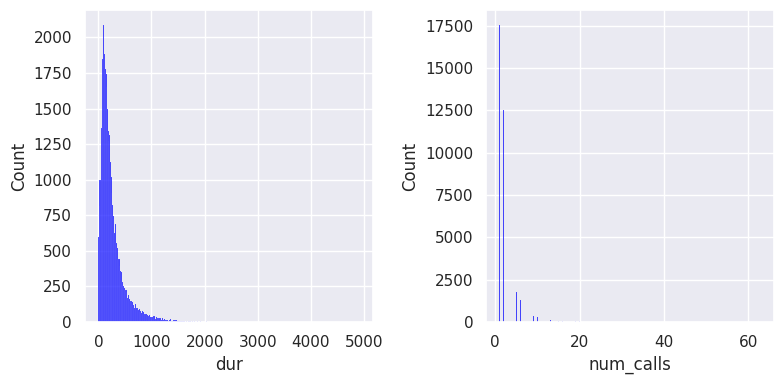

In [ ]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.histplot(df.dur,color = 'blue')
plt.subplot(1,2,2)
sns.histplot(df.num_calls,color = 'blue')
plt.tight_layout()

Observation :
Call duration and number of calls done to a customer seems important in insurance subscription.

## Percentge distribution for job, marital, education_qual, call_type, mon, prev_outcomes :

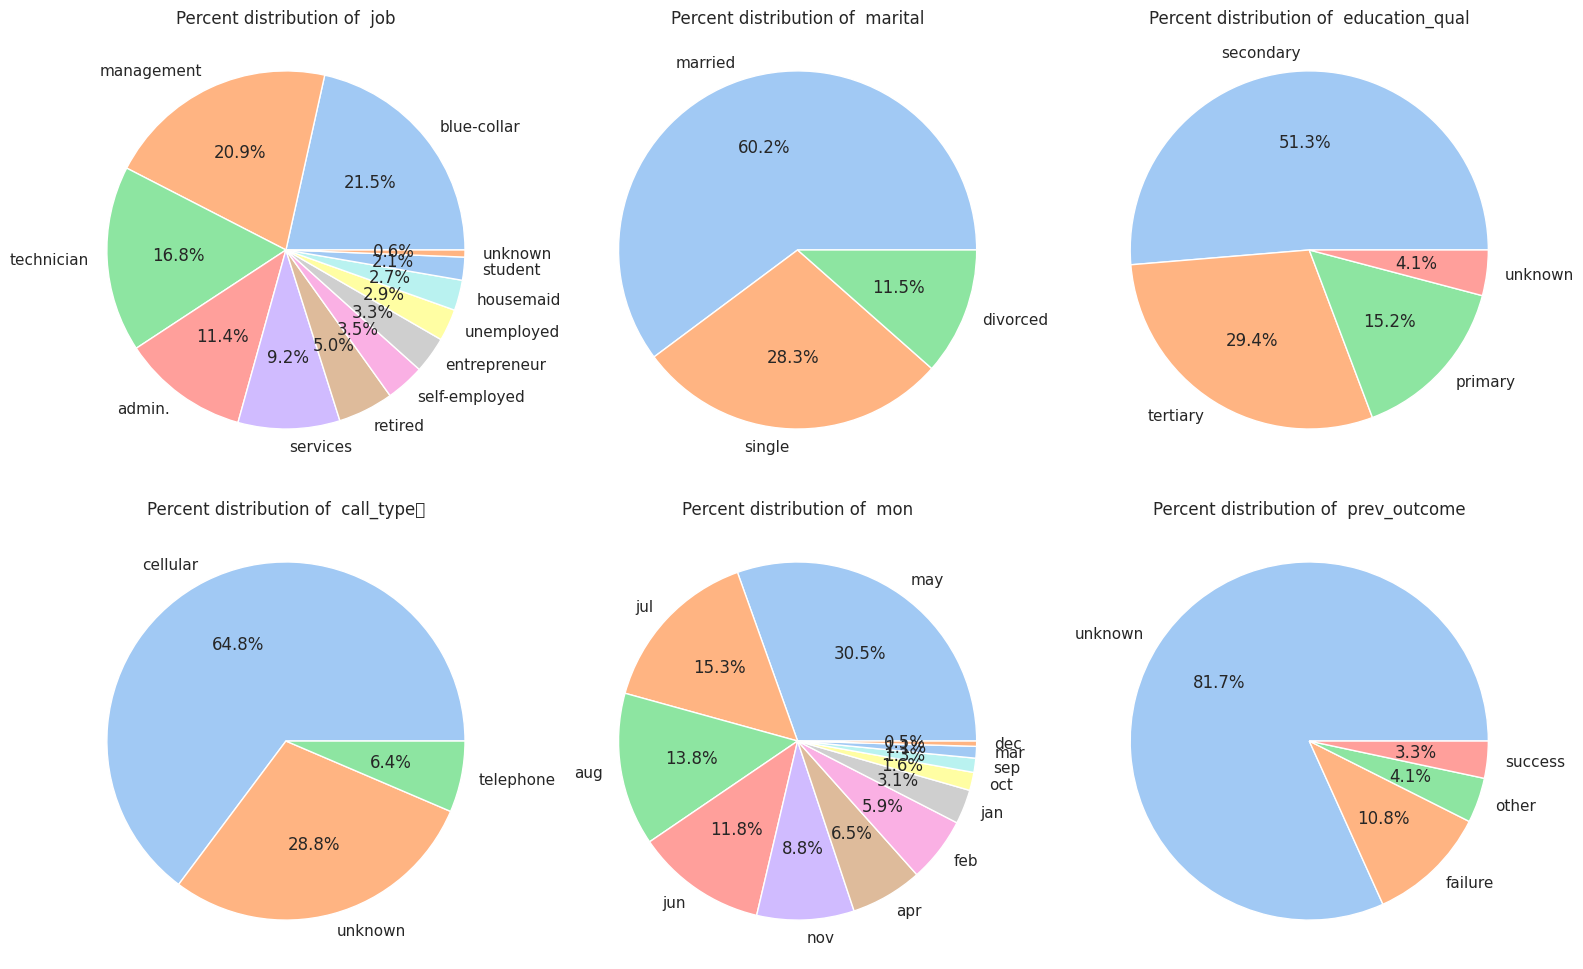

In [ ]:
plt.figure(figsize=(16,10))

plt.subplot(231)
df_source = df.job.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['job'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  job')
plt.axis('equal')

plt.subplot(232)
df_source = df.marital.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['marital'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  marital')
plt.axis('equal')

plt.subplot(233)
df_source = df.education_qual.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['education_qual'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  education_qual')
plt.axis('equal')

plt.subplot(234)
df_source = df.call_type	.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['call_type'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  call_type	')
plt.axis('equal')

plt.subplot(235)
df_source = df.mon.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['mon'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  mon')
plt.axis('equal')

plt.subplot(236)
df_source = df.prev_outcome.value_counts()
df_source = df_source.reset_index()
plt.pie(df_source['prev_outcome'],labels=df_source['index'],autopct='%1.1f%%')
plt.title('Percent distribution of  prev_outcome')
plt.axis('equal')

plt.tight_layout()
plt.show()

Observation :
1. Job : There are a higher percentage of blue-collar and unknown to be in the least percentage.
2. Marital Status :  There are a higher percentage of married customers than single & divorced.
3. Educational Qualification : There are a higher percentage of Secondary education and least of unknown.
4. Call_type : Higher number of calls were executed by cellular device and least by telephone.
5. Month : Highest number of calls were done in the month of May and least in December.
6. Previous_Outcomes : Unknown outcomes are higher than others.


# Continuous feature :

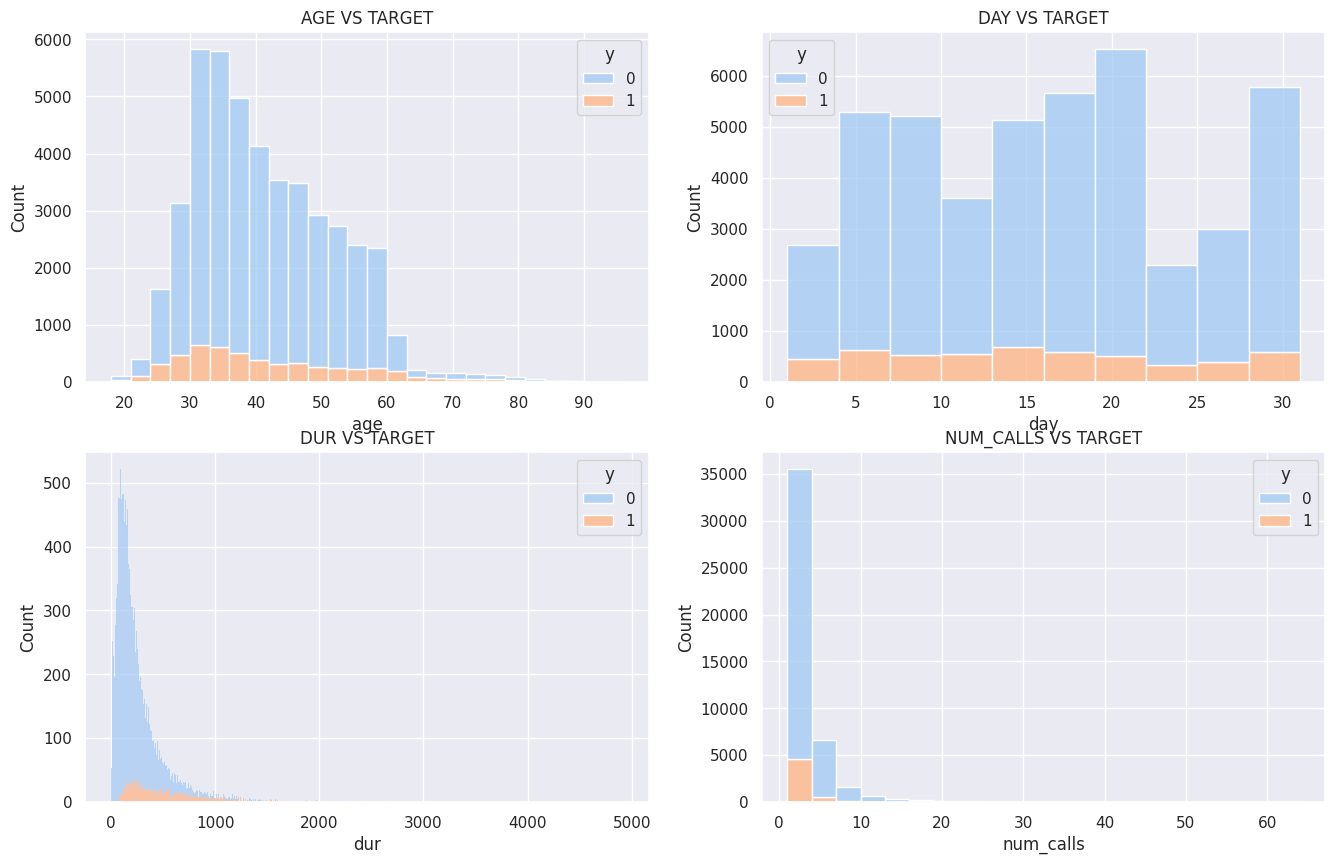

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(16,10))

plt.subplot(221)
sns.histplot(data=df, x="age", hue="y", multiple="stack",binwidth=3)
plt.title('AGE VS TARGET')

plt.subplot(222)
sns.histplot(data=df, x="day", hue="y", multiple="stack",binwidth=3)
plt.title('DAY VS TARGET')

plt.subplot(223)
sns.histplot(data=df, x="dur", hue="y", multiple="stack",binwidth=3)
plt.title('DUR VS TARGET')

plt.subplot(224)
sns.histplot(data=df, x="num_calls", hue="y", multiple="stack",binwidth=3)
plt.title('NUM_CALLS VS TARGET')

plt.show()
plt.tight_layout()

## Feature vs Target variable :

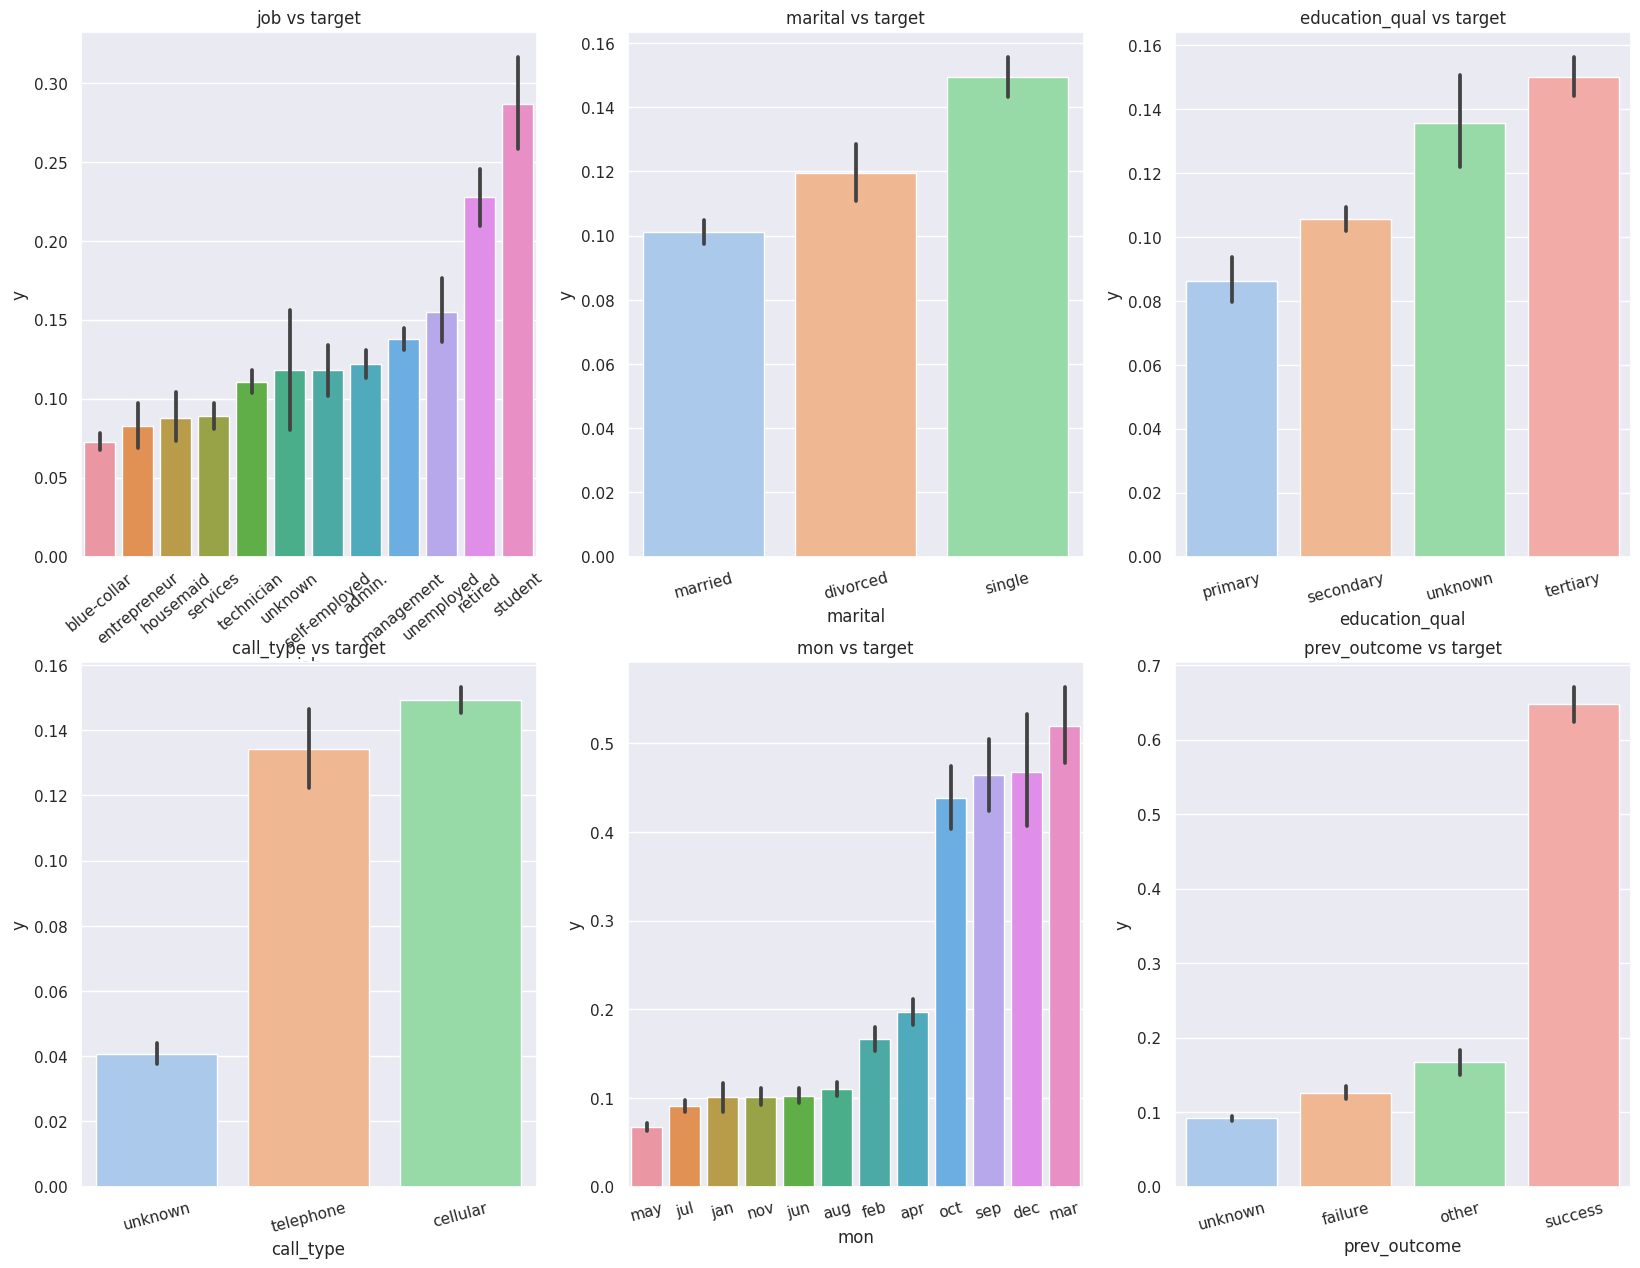

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,15))

plt.subplot(231)
sns.barplot(x='job',y='y',data=df,order=df.groupby('job')['y'].mean().reset_index().sort_values('y')['job'])
plt.xticks(rotation=40)
plt.title('job vs target')

plt.subplot(232)
sns.barplot(x='marital',y='y',data=df,order=df.groupby('marital')['y'].mean().reset_index().sort_values('y')['marital'])
plt.xticks(rotation=15)
plt.title('marital vs target')

plt.subplot(233)
sns.barplot(x='education_qual',y='y',data=df,order=df.groupby('education_qual')['y'].mean().reset_index().sort_values('y')['education_qual'])
plt.xticks(rotation=15)
plt.title('education_qual vs target')

plt.subplot(234)
sns.barplot(x='call_type',y='y',data=df,order=df.groupby('call_type')['y'].mean().reset_index().sort_values('y')['call_type'])
plt.xticks(rotation=15)
plt.title('call_type vs target')

plt.subplot(235)
sns.barplot(x='mon',y='y',data=df,order=df.groupby('mon')['y'].mean().reset_index().sort_values('y')['mon'])
plt.xticks(rotation=15)
plt.title('mon vs target')

plt.subplot(236)
sns.barplot(x='prev_outcome',y='y',data=df,order=df.groupby('prev_outcome')['y'].mean().reset_index().sort_values('y')['prev_outcome'])
plt.xticks(rotation=15)
plt.title('prev_outcome vs target')

plt.show()
plt.tight_layout()




Observation :
1. Job : Students are are interested more to subscribe  than other groups.
2. Marital Status : Single customers are interested more to subscribe than other groups.
3. Educational Qualification : Tertiary customers are interested more to subscribe than other groups.
4. Call_Type : Most calls are executed by cellular device than other means.
5. Month : March and December are the months were higher number of subscriptions are done respectively.
6. Previous_Outcomes :  Success group of customers are more interested to subscribe than other groups.


# Feature analysis :

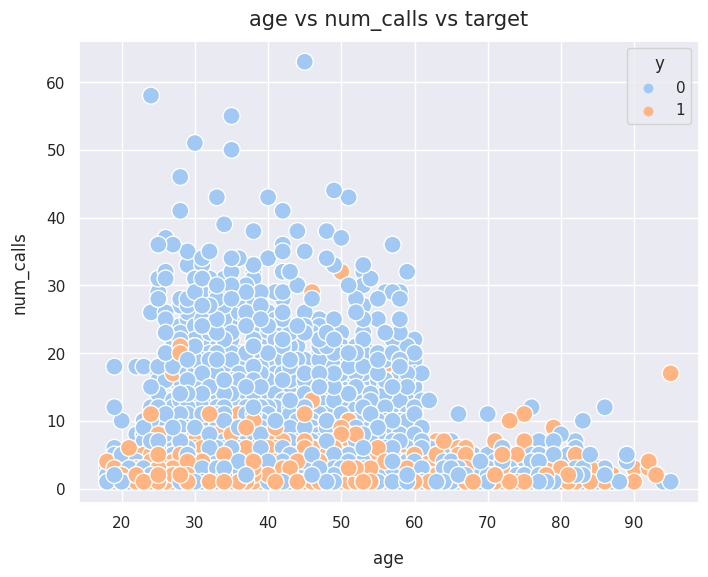

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='num_calls', hue='y', data=df, s=150)
plt.title("age vs num_calls vs target", y=1.015, fontsize=15)
plt.xlabel("age", labelpad=13)
plt.ylabel("num_calls", labelpad=13)
ax = plt.gca()

Observation :
Customers aged between 20 and 55 have received more number of calls.

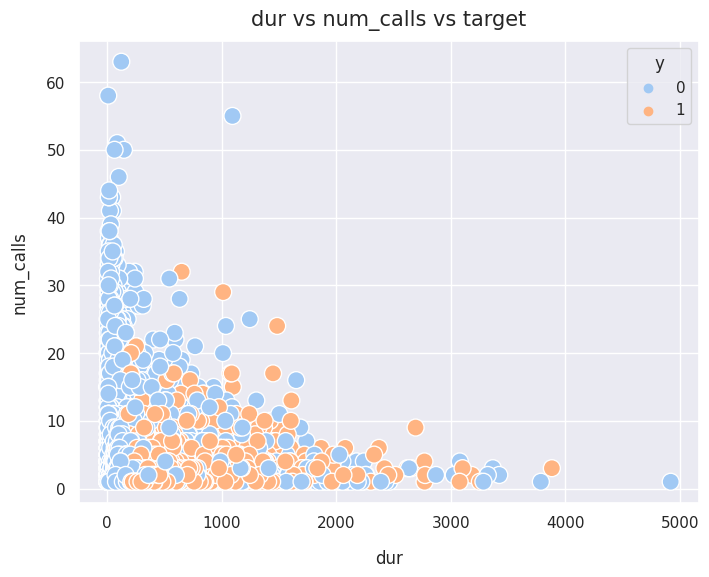

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x='dur', y='num_calls', hue='y', data=df, s=150)
plt.title("dur vs num_calls vs target", y=1.015, fontsize=15)
plt.xlabel("dur", labelpad=13)
plt.ylabel("num_calls", labelpad=13)
ax = plt.gca()

Observation :

Customers with least duration of calls, are been called more number of times.

Customers with a better duration of calls, have good chances have insurance been subscribed.

# Encoding the data :

In [ ]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                  int64
dtype: object

# Label encoding :

In [ ]:
df['job']=df['job'].map({'blue-collar':0,'entrepreneur':1,'housemaid':2,'services':3,'technician':4,'unknown':5,'self-employed':6,'admin.':7,'management':8,'unemployed':9,'retired':10,'student':11})
df['education_qual']=df['education_qual'].map({'primary':0,'secondary':1,'unknown':2,'tertiary':3})
df['call_type']=df['call_type'].map({'unknown':0,'telephone':1,'cellular':2})
df['mon']=df['mon'].map({'may':0,'jul':1,'jan':2,'nov':3,'jun':4,'aug':5,'feb':6,'apr':7,'oct':8,'sep':9,'dec':10,'mar':11})

# One-hot encoding :

In [ ]:
data= pd.get_dummies(df, columns=["marital",'prev_outcome'])
data.head()

,age,job,education_qual,call_type,day,mon,dur,num_calls,y,marital_divorced,marital_married,marital_single,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,8,3,0,5,0,261,1,0,0,1,0,0,0,0,1
1,44,4,1,0,5,0,151,1,0,0,0,1,0,0,0,1
2,33,1,1,0,5,0,76,1,0,0,1,0,0,0,0,1
3,47,0,2,0,5,0,92,1,0,0,1,0,0,0,0,1
4,33,5,2,0,5,0,198,1,0,0,0,1,0,0,0,1


We are now done with encoding part.

In [ ]:
data.head()

,age,job,education_qual,call_type,day,mon,dur,num_calls,y,marital_divorced,marital_married,marital_single,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58,8,3,0,5,0,261,1,0,0,1,0,0,0,0,1
1,44,4,1,0,5,0,151,1,0,0,0,1,0,0,0,1
2,33,1,1,0,5,0,76,1,0,0,1,0,0,0,0,1
3,47,0,2,0,5,0,92,1,0,0,1,0,0,0,0,1
4,33,5,2,0,5,0,198,1,0,0,0,1,0,0,0,1


# Target & feature selection :

In [ ]:
X = data[['age', 'job', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls','marital_divorced', 'marital_married',
       'marital_single', 'prev_outcome_failure', 'prev_outcome_other',
       'prev_outcome_success', 'prev_outcome_unknown']].values
y = data['y'].values

We have selected our features and the target variable

# Splitting :

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

We are done with splitting of the data.

# Random Undersampling :

In [ ]:
from imblearn.under_sampling import RandomUnderSampler #  import
rus = RandomUnderSampler() #Intialise the model
X_rus, y_rus = rus.fit_resample(X_train, y_train) #resampling the data

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr1 = LogisticRegression()
lr1.fit(X_rus,y_rus)
lr1.score(X_rus,y_rus)

0.8014950166112956

# Random Oversampling :

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler() #Initialis the model
X_ros, y_ros = ros.fit_resample(X_train, y_train) #Fit the model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr2 = LogisticRegression()
lr2.fit(X_ros,y_ros)
lr2.score(X_ros,y_ros)

0.801564945226917

# SMOTE :

In [ ]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr3 = LogisticRegression()
lr3.fit(X_sm,y_sm)
lr3.score(X_sm,y_sm)

0.8612206572769953

In [ ]:
 !pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import imblearn

# SMOTEENN :

In [ ]:
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')
X_smt, y_smt = smt.fit_resample(X_train, y_train)

In [ ]:
import collections, numpy
counter = collections.Counter(y_smt)
counter

Counter({0: 23434, 1: 30526})

# To balance the data:

1. For Random under sampling , the model score is 80.1%
2. For Random over sampling , the model score is 80.2%
3. SMOTE, the model score is 86.12%
4. SMOTE + Tomek, the model score is 92.2%.

Here we got the best score from SMOTE+Tomek which is 92.2%.

Now,We gonna use SMOTE+Tomek technique to build the models.

# 1. Logistic Regression :

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr = LogisticRegression()
lr.fit(X_smt,y_smt)
lr.score(X_smt,y_smt)
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(X_test)[:, 1]))

AUROC on the sampled dataset :  0.868941781641745


In [ ]:
lr.predict_proba(X_test)

array([[0.36112791, 0.63887209],
       [0.88278629, 0.11721371],
       [0.43542229, 0.56457771],
       ...,
       [0.88340367, 0.11659633],
       [0.96817303, 0.03182697],
       [0.92801275, 0.07198725]])

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt



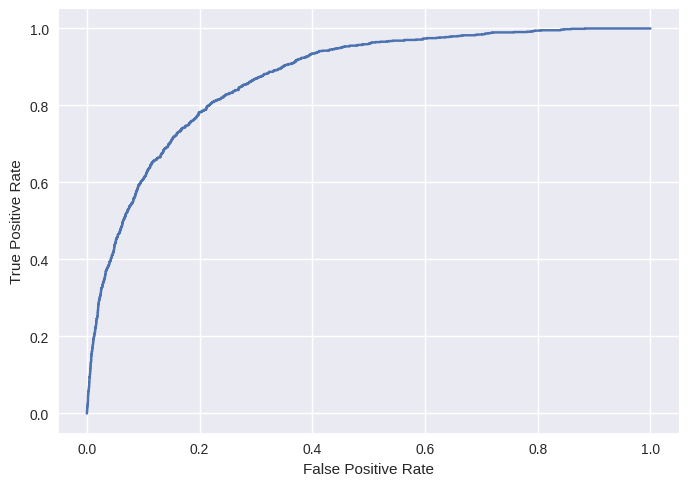

In [ ]:
#define metrics
log_regression = LogisticRegression()
log_regression.fit(X_train,y_train)
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 2. Decision Tree :

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
dt = DecisionTreeClassifier()
dt.fit(X_smt,y_smt)
print(dt.score(X_smt,y_smt))
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(X_test)[:, 1]))

1.0
AUROC on the sampled dataset :  0.7968405257226935


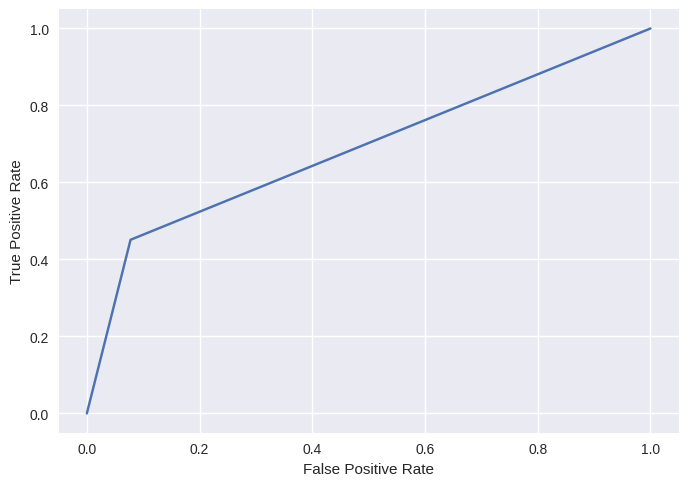

In [ ]:
#define metrics
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
y_pred_proba = decision_tree.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, RocCurveDisplay
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_smt, y_smt) # the model is trained
  trainAccuracy = accuracy_score(y_smt, dt.predict(X_smt)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X_test, y_test, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7838584136397332  Cross val score :  0.8810972717938688
Depth  :  2  Training Accuracy :  0.8020385470719051  Cross val score :  0.8904999266611254
Depth  :  3  Training Accuracy :  0.8661045218680504  Cross val score :  0.8949240942649
Depth  :  4  Training Accuracy :  0.9080800593031876  Cross val score :  0.8995695008067278
Depth  :  5  Training Accuracy :  0.9141401037805782  Cross val score :  0.8962522612819634
Depth  :  6  Training Accuracy :  0.925240919199407  Cross val score :  0.8953670610668361
Depth  :  7  Training Accuracy :  0.9353409933283914  Cross val score :  0.8918276047523589
Depth  :  8  Training Accuracy :  0.9441623424759081  Cross val score :  0.8912749963330562
Depth  :  9  Training Accuracy :  0.9497776130467013  Cross val score :  0.8919383464528432
Depth  :  10  Training Accuracy :  0.9579318013343218  Cross val score :  0.8911632767809123
Depth  :  20  Training Accuracy :  0.999184581171238  Cross val score :  0.87335696

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_smt,y_smt)
print(dt.score(X_smt,y_smt))
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(X_test)[:, 1]))

0.9080800593031876
AUROC on the sampled dataset :  0.868941781641745


# 3. K-Nearest Neighbour :

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]:
  knn= KNeighborsClassifier(i)
  knn.fit(X_smt, y_smt)
  print("K value :", i, "Cross Value Accuracy :" , np.mean(cross_val_score(knn, X_test, y_test, cv=10)))

K value : 1 Cross Value Accuracy : 0.8534458270180414
K value : 2 Cross Value Accuracy : 0.8794382242213856
K value : 3 Cross Value Accuracy : 0.8783336185400674
K value : 4 Cross Value Accuracy : 0.8843059697843836
K value : 5 Cross Value Accuracy : 0.8844168337163252
K value : 6 Cross Value Accuracy : 0.885190681073681
K value : 7 Cross Value Accuracy : 0.8850803060675695
K value : 8 Cross Value Accuracy : 0.8853011783112501
K value : 9 Cross Value Accuracy : 0.8850803060675696
K value : 10 Cross Value Accuracy : 0.8854117977802767
K value : 20 Cross Value Accuracy : 0.8849696865985429
K value : 30 Cross Value Accuracy : 0.8843056030900112
K value : 40 Cross Value Accuracy : 0.8840842419205007
K value : 50 Cross Value Accuracy : 0.8833100278687723


In [ ]:
knn= KNeighborsClassifier(i)
knn.fit(X_smt, y_smt)
print(knn.score(X_smt,y_smt))
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, knn.predict_proba(X_test)[:, 1]))

0.9123054114158636
AUROC on the sampled dataset :  0.848859863723149


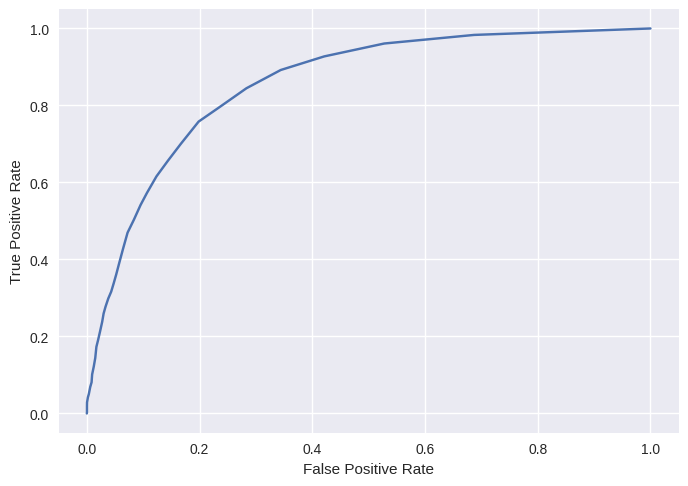

In [ ]:
#define metrics
knn = KNeighborsClassifier(i)
knn.fit(X_train,y_train)
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 4. XG_Boost :

In [ ]:
import xgboost as xgb

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model model.fit(X_smt,y_smt) #train the model
  print("Learning rate : ", lr," Cross-Val score : ", np.mean(cross_val_score(model, X_test, y_test, cv=10)))

Learning rate :  0.01  Cross-Val score :  0.9005655649537964
Learning rate :  0.02  Cross-Val score :  0.8989062729183983
Learning rate :  0.03  Cross-Val score :  0.9006760621913656
Learning rate :  0.04  Cross-Val score :  0.9000125898401213
Learning rate :  0.05  Cross-Val score :  0.8987967535324891
Learning rate :  0.1  Cross-Val score :  0.8992384980198505
Learning rate :  0.11  Cross-Val score :  0.8991282452451964
Learning rate :  0.12  Cross-Val score :  0.8989066396127707
Learning rate :  0.13  Cross-Val score :  0.8976903143793086
Learning rate :  0.14  Cross-Val score :  0.8980215616291009
Learning rate :  0.15  Cross-Val score :  0.8978004449225052
Learning rate :  0.2  Cross-Val score :  0.9022243680633648
Learning rate :  0.5  Cross-Val score :  0.8937072801056081
Learning rate :  0.7  Cross-Val score :  0.8935973940253265
Learning rate :  1  Cross-Val score :  0.8904995599667529


In [ ]:
X_smt

array([[54,  0,  1, ...,  0,  0,  1],
       [53,  2,  1, ...,  0,  0,  1],
       [28,  7,  1, ...,  0,  0,  0],
       ...,
       [44,  2,  0, ...,  0,  0,  0],
       [29,  5,  2, ...,  0,  0,  1],
       [71, 10,  0, ...,  0,  1,  0]])

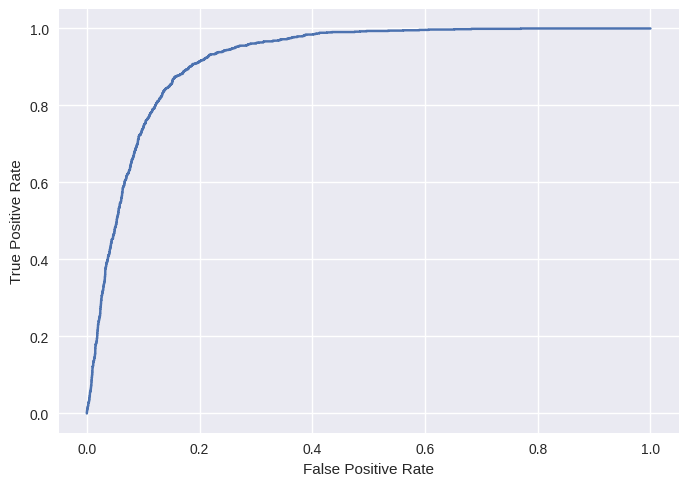

In [ ]:
#define metrics
model = xgb.XGBClassifier(learning_rate = 0.14, n_estimators=100, verbosity = 0)
model.fit(X_smt,y_smt)
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 5. Random Forest :

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,criterion="entropy")
classifier.fit(X_smt, y_smt)
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

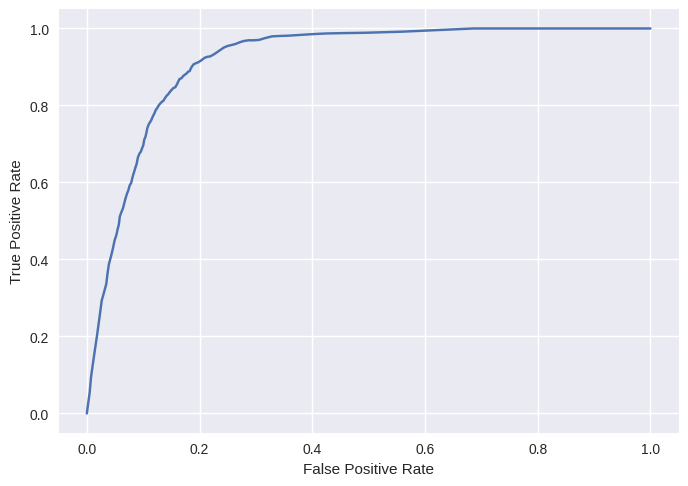

In [ ]:
#define metrics
classifier = RandomForestClassifier(n_estimators=100,criterion="entropy")
classifier.fit(X_smt, y_smt)
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,criterion="entropy")
classifier.fit(X_smt, y_smt)
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, classifier.predict_proba(X_test)[:, 1]))

AUROC on the sampled dataset :  0.9144942750877275


# Feature importance from all Models :

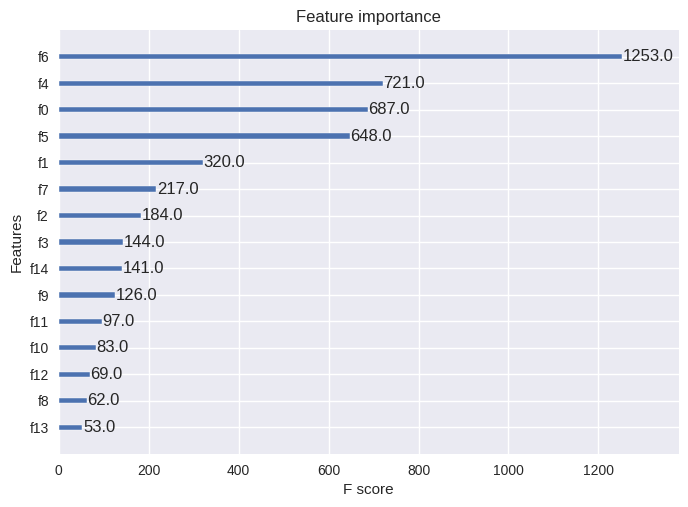

In [ ]:
from xgboost import plot_importance

# plot feature importance
plot_importance(model)
plt.show()

In [ ]:
importance = dt.feature_importances_
list(zip(importance,['age', 'job', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls','marital_divorced', 'marital_married',
       'marital_single', 'prev_outcome_failure', 'prev_outcome_other',
       'prev_outcome_success', 'prev_outcome_unknown']))

[(0.002741221928962035, 'age'),
 (0.0, 'job'),
 (0.0, 'education_qual'),
 (0.003202181966296219, 'call_type'),
 (0.0, 'day'),
 (0.08207164284840678, 'mon'),
 (0.5460752857429657, 'dur'),
 (0.0, 'num_calls'),
 (0.0, 'marital_divorced'),
 (0.0, 'marital_married'),
 (0.0, 'marital_single'),
 (0.1022516092965451, 'prev_outcome_failure'),
 (0.044687234122256815, 'prev_outcome_other'),
 (0.0, 'prev_outcome_success'),
 (0.2189708240945674, 'prev_outcome_unknown')]

In [ ]:
importance = classifier.feature_importances_
list(zip(importance,['age', 'job', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls','marital_divorced', 'marital_married',
       'marital_single', 'prev_outcome_failure', 'prev_outcome_other',
       'prev_outcome_success', 'prev_outcome_unknown']))

[(0.06187505618925932, 'age'),
 (0.041875368670518505, 'job'),
 (0.018290340704797577, 'education_qual'),
 (0.03788036366272253, 'call_type'),
 (0.05817640765517205, 'day'),
 (0.09238347848112019, 'mon'),
 (0.3833300794768233, 'dur'),
 (0.04022713945290969, 'num_calls'),
 (0.03036459055913274, 'marital_divorced'),
 (0.03872278745574924, 'marital_married'),
 (0.030476047340238382, 'marital_single'),
 (0.048060372549071244, 'prev_outcome_failure'),
 (0.019663723587424742, 'prev_outcome_other'),
 (0.00658479280581302, 'prev_outcome_success'),
 (0.09208945140924756, 'prev_outcome_unknown')]

In [ ]:
importance = model.feature_importances_
list(zip(importance,['age', 'job', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls','marital_divorced', 'marital_married',
       'marital_single', 'prev_outcome_failure', 'prev_outcome_other',
       'prev_outcome_success', 'prev_outcome_unknown']))

[(0.010711979, 'age'),
 (0.015000634, 'job'),
 (0.008956716, 'education_qual'),
 (0.051940743, 'call_type'),
 (0.011650879, 'day'),
 (0.04152484, 'mon'),
 (0.082784325, 'dur'),
 (0.019291721, 'num_calls'),
 (0.044926032, 'marital_divorced'),
 (0.027206844, 'marital_married'),
 (0.053479247, 'marital_single'),
 (0.19058485, 'prev_outcome_failure'),
 (0.14774752, 'prev_outcome_other'),
 (0.026757117, 'prev_outcome_success'),
 (0.26743668, 'prev_outcome_unknown')]

# Solution Statement :

Models are tested to see which one can better predict consumer conversion.

1. Logistic Regression, the model AUROC score is 0.87
2. Decision Tree, the model AUROC score is 0.8,
3. KNN, the model AUROC score is 0.85
4. XG_Boost Classifier, the model AUROC score is 0.9
5. Random Forest, the model AUROC score is 0.91

The model Random Forest has the highest AUROC score, which is at 0.914

After building the Model, the important features for Customer Insurance Predictions are :
1. Call_Duration : The amount of time spent with the customer during the call, may have major impact in the conversion.
2. Month : As March is the end of any financial year, that might be the ideal time to subscribe for an insurance.
3. Previous_Outcomes
4. Marital_Status : Married group of customers have consider more to subscribe for an insurance.